In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [14]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [15]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [16]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3176 - loss: 1.8373 - val_accuracy: 0.5214 - val_loss: 1.3339
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5320 - loss: 1.3103 - val_accuracy: 0.5774 - val_loss: 1.2063
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5991 - loss: 1.1322 - val_accuracy: 0.6140 - val_loss: 1.1031
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6453 - loss: 1.0170 - val_accuracy: 0.6200 - val_loss: 1.1074
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6738 - loss: 0.9312 - val_accuracy: 0.6500 - val_loss: 0.9891
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7011 - loss: 0.8566 - val_accuracy: 0.6982 - val_loss: 0.8709
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7191 - loss: 0.8003 - val_accuracy: 0.6972 - val_loss: 0.8682
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7371 - loss: 0.7537 - 

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7095 - loss: 0.8728
Test accuracy: 0.7020000219345093


In [20]:
# Make predictions using the trained model
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


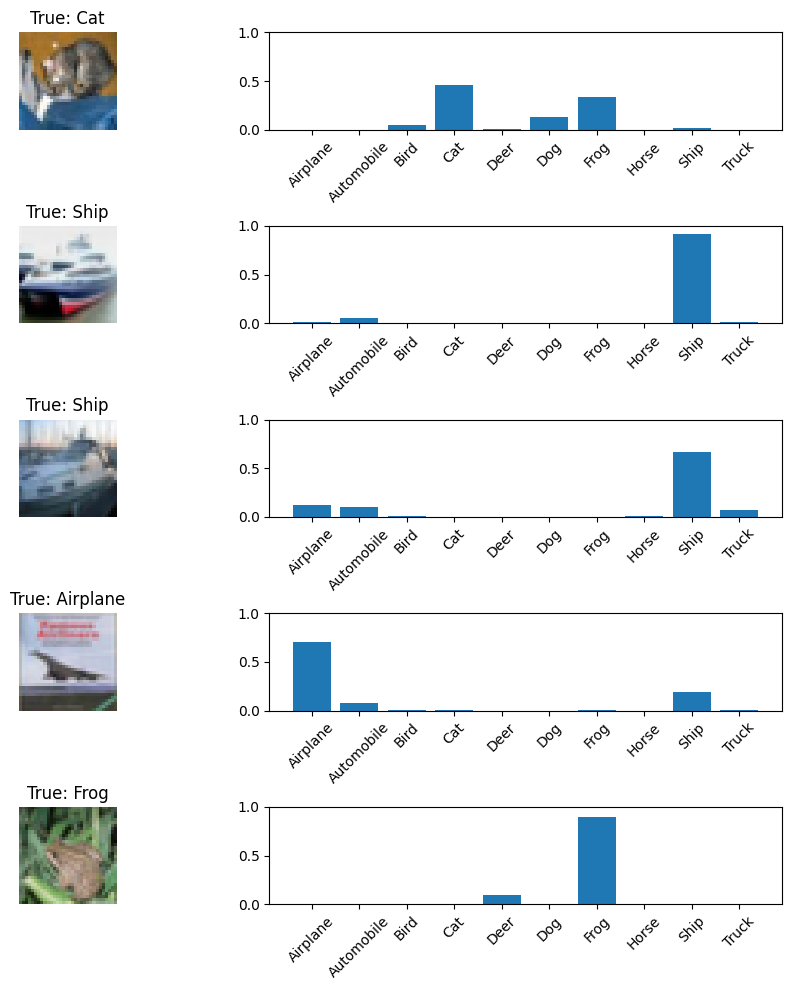

In [21]:
# Display a few predictions and their corresponding true labels
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[np.argmax(test_labels[i])]}")
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10), class_names, rotation=45)
    plt.ylim([0, 1])
plt.tight_layout()
plt.show()